In [70]:
#Importing the necessary libraries
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# Calculating Cumulative Count Cut
def scaleCCC(x):
    return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

#List of all the images
# images_list=["2_P.tif","2_A.tif","3_P.tif","3_A.tif","4_P.tif","4_A.tif","5_P.tif","5_A.tif","6_P.tif","6_A.tif","7_P.tif","7_A.tif"]
images_list=["2_P.tif","2_A.tif","3_P.tif","3_A.tif","4_P.tif","4_A.tif","5_P.tif","5_A.tif","6_P.tif","6_A.tif","7_P.tif","7_A.tif","8_P.tif","8_A.tif","9_P.tif","9_A.tif","10_P.tif","10_A.tif","11_P.tif","11_A.tif","12_P.tif","12_A.tif","13_P.tif","13_A.tif", "14_P.tif", "14_A.tif", "15_P.tif", "15_A.tif"]
images_open =[]

# Opening the satellite images
for img_name in images_list:
  img_open = gdal.Open('./ALL_FLOOD/'+img_name)
  # Extracting individual bands(4,8,12) from the uploaded images
  band4 = img_open.GetRasterBand(1).ReadAsArray()
  band8 = img_open.GetRasterBand(2).ReadAsArray()
  band12 = img_open.GetRasterBand(3).ReadAsArray()
  ccc4 = scaleCCC(band4)
  ccc8 = scaleCCC(band8)
  ccc12 = scaleCCC(band12)
  # Creating a new images by combining the three bands 
  images_open.append(np.dstack((ccc4,ccc8,ccc12)))

all_images_array= images_open

In [71]:
# Reshaping the images

reshaped_images=[]
for i in range(len(all_images_array)):
  new_shape = (all_images_array[i].shape[0] * all_images_array[i].shape[1], all_images_array[i].shape[2])
  new_image = all_images_array[i][:, :, :3].reshape(new_shape)
  reshaped_images.append(new_image)

In [72]:
# Shape of the one image
print(reshaped_images[0].shape)

#concatenating all the arrays
combined_image = reshaped_images[0]
for i in range(1, len(reshaped_images)):
  combined_image = np.concatenate((combined_image, reshaped_images[i]), axis=0)

# Shape of the all images
print(combined_image.shape)

(167232, 3)
(4691698, 3)


In [73]:
# Removing nan values
combined_image2 = np.nan_to_num(combined_image)

In [74]:
import numpy as np
from sklearn.mixture import GaussianMixture

def gmm_clustering(X, k):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    return gmm


In [75]:
GMM_labels = gmm_clustering(combined_image2,3)

In [76]:
GMM_labels

GaussianMixture(n_components=3)

In [107]:
from osgeo import gdal
# Opening the satellite images
imgP = gdal.Open("./ALL_FLOOD/1_P.tif")

# Extracting individual bands(4,8,12) from the uploaded images
band4_before = imgP.GetRasterBand(1).ReadAsArray()
band8_before = imgP.GetRasterBand(2).ReadAsArray()
band12_before = imgP.GetRasterBand(3).ReadAsArray()

ds_before = None

ccc4_before = scaleCCC(band4_before)
ccc8_before = scaleCCC(band8_before)
ccc12_before = scaleCCC(band12_before)

# Creating a new images by combining the three bands 
before_img = np.dstack((ccc4_before,ccc8_before,ccc12_before))

In [108]:
new_before_shape = (before_img.shape[0] * before_img.shape[1], before_img.shape[2])
X_before = before_img[:, :, :3].reshape(new_before_shape)

In [109]:
test_GMM_before = GMM_labels.predict(X_before)
X_cluster_before = test_GMM_before
X_cluster_before = X_cluster_before.reshape(before_img[:, :, 0].shape)

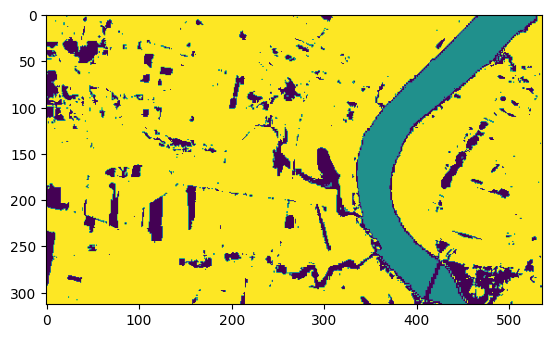

In [110]:
# Visualizing the clusters formed for post-flood image

plt.figure()
im_before = plt.imshow(X_cluster_before)
plt.show()

In [113]:
# Calculating water percentage for before image

arr_before = np.unique(X_cluster_before, return_counts=True)
key_before, val_before = arr_before
water_before = val_before[0]/(val_before[1] + val_before[2] + val_before[0]) * 100
print("%.2f" %water_before, "%")

9.92 %
